<h1><b>Training Model (Phase 1) <b/></h1>

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-32d35811-a92d-0dbd-b28a-894c746aaa3a)


In [ ]:
from google.colab import drive
drive.mount('drive', force_remount=True)

Mounted at drive


<h3><b>Renaming audio files</b></h3>

In [ ]:
import os
from tqdm.notebook import tqdm
def rename_wave_files(folder_path):
    files = os.listdir(folder_path)
    wav_files = [f for f in files if f.lower().endswith('.wav')]

    print(f'Folder path: {folder_path}')
    print(f'All files in the folder: {files}')
    print(f'Wave files found: {len(wav_files)}')

    for index, wav_file in tqdm(enumerate(wav_files, start=1),total = len(wav_files)):
        old_path = os.path.join(folder_path, wav_file)
        new_path = os.path.join(folder_path, f'{index}.wav')
        os.rename(old_path, new_path)

folder_path = r'/content/drive/MyDrive/dataset/wavRecs'
rename_wave_files(folder_path)
print("Wave files renamed successfully!")

Folder path: /content/drive/MyDrive/dataset/wavRecs
All files in the folder: ['.DS_Store', 'Narsapur Road 232.wav', 'Narsapur Road 187.wav', 'New Recording 122.wav', 'Narsapur Road 21.wav', 'Narsapur Road 144.wav', 'Narsapur Road 150.wav', 'Narsapur Road 226.wav', 'New Recording 136.wav', 'New Recording 99.wav', 'Narsapur Road 178.wav', 'Narsapur Road 35.wav', 'Narsapur Road 193.wav', 'Narsapur Road 20.wav', 'Narsapur Road 151.wav', 'New Recording 72.wav', 'Narsapur Road 186.wav', 'New Recording 137.wav', 'New Recording 67.wav', 'Narsapur Road 145.wav', 'Narsapur Road 192.wav', 'New Recording 73.wav', 'New Recording 66.wav', 'Narsapur Road 34.wav', 'Narsapur Road 179.wav', 'New Recording 98.wav', 'New Recording 123.wav', 'Narsapur Road 231.wav', 'Narsapur Road 227.wav', 'New Recording 109.wav', 'Narsapur Road 36.wav', 'Narsapur Road 190.wav', 'New Recording 121.wav', 'Narsapur Road 153.wav', 'Narsapur Road 225.wav', 'Narsapur Road 233.wav', 'Narsapur Road 147.wav', 'Narsapur Road 184.w

  0%|          | 0/500 [00:00<?, ?it/s]

Wave files renamed successfully!


<h3><b>Transcribing audio files</b></h3>

In [ ]:
!pip install git+https://github.com/openai/whisper.git
import os
import whisper


wav_directory = "/content/drive/MyDrive/dataset/wavRecs"

output_file = os.path.join(r"/content/drive/MyDrive/dataset", "list.txt")

wav_files_range = range(1, 501)

file_and_transcripts = []

for i in tqdm(wav_files_range):
    wav_file = os.path.join(wav_directory, f"{i}.wav")

    if os.path.exists(wav_file):

        try:
            model = whisper.load_model("base")
            transcript = model.transcribe(wav_file)['text']
        except FileNotFoundError:
            print(f"File not found: {wav_file}")
            continue

        file_and_transcripts.append(
            f"/content/TTS-TT2/wavs/{i}.wav|{transcript}")
    else:
        print(f"File not found: {wav_file}")

with open(output_file, "w") as f:
    for line in file_and_transcripts:
        f.write(f"{line}\n")

print(f"File '{output_file}' created successfully.")

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-_u2x7c5q
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-_u2x7c5q
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)


  0%|          | 0/500 [00:00<?, ?it/s]


  0%|                                               | 0.00/139M [00:00<?, ?iB/s]
  7%|██▍                                   | 9.05M/139M [00:00<00:01, 94.9MiB/s]
 17%|██████▋                                | 23.7M/139M [00:00<00:00, 129MiB/s]
 26%|██████████▏                            | 36.0M/139M [00:00<00:00, 129MiB/s]
 35%|█████████████▌                         | 48.3M/139M [00:00<00:00, 128MiB/s]
 44%|█████████████████                      | 60.5M/139M [00:00<00:00, 119MiB/s]
 52%|████████████████████▎                  | 71.9M/139M [00:00<00:00, 112MiB/s]
 60%|███████████████████████▌               | 83.6M/139M [00:00<00:00, 115MiB/s]
 68%|██████████████████████████▋            | 94.7M/139M [00:00<00:00, 112MiB/s]
 76%|██████████████████████████████▍         | 105M/139M [00:00<00:00, 110MiB/s]
 84%|█████████████████████████████████▋      | 117M/139M [00:01<00:00, 112MiB/s]
100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 116MiB/s]


File '/content/drive/MyDrive/dataset/list.txt' created successfully.


<h3><b>Pre-processing audio files</b></h3>

In [ ]:
import os
import librosa
import soundfile as sf

input_path = "/content/drive/MyDrive/dataset/wavRecs"
output_path = "/content/drive/MyDrive/dataset/wavs"

if not os.path.exists(output_path):
    os.makedirs(output_path)

for filename in tqdm(os.listdir(input_path)):
    if filename.endswith(".wav"):

        filepath = os.path.join(input_path, filename)
        y, sr = librosa.load(filepath, sr=22050)

        trimmed_audio, _ = librosa.effects.trim(y, top_db=20)

        normalized_audio = librosa.util.normalize(trimmed_audio)

        output_filepath = os.path.join(output_path, filename)

        sf.write(output_filepath, normalized_audio, sr, subtype='PCM_16')

print("All .wav files have been preprocessed and saved to the wavs folder.")

  0%|          | 0/501 [00:00<?, ?it/s]

All .wav files have been preprocessed and saved to the wavs folder.


<h1><b> Installing pre-trained NVIDIA Tacotron2 Model and its dependencies </b></h1>

In [ ]:
%matplotlib inline
import os
import io
%cd /content/
if not os.path.isdir("/content/TTS-TT2/"):
  print("Cloning Tacotron2")
  !git clone https://github.com/sakrin18072/ARPAtaco2 TTS-TT2
  %cd /content/TTS-TT2/
  !git submodule init
  !git submodule update
%cd /content/TTS-TT2/
print("Downloading tacotron2 requirements")
!pip install matplotlib numpy inflect scipy Unidecode pillow
!pip install git+https://github.com/wkentaro/gdown.git
import gdown
!git submodule init
!git submodule update
!pip install ffmpeg-normalize
!pip install -q unidecode tensorboardX
!apt-get -qq install sox
!apt-get install pv
!apt-get install jq
!wget https://raw.githubusercontent.com/tonikelope/megadown/master/megadown -O megadown.sh
!chmod 755 megadown.sh
tt2_pretrained_url = "https://github.com/justinjohn0306/ARPAtaco2/releases/download/pretrained_model/tacotron2_statedict.pt"
tt2_pretrained_path = "/content/TTS-TT2/tacotron2_statedict.pt"

if not os.path.isfile(tt2_pretrained_path):
  print("Downloading tt2 pretrained model using wget")
  !wget {tt2_pretrained_url} -O {tt2_pretrained_path}

latest_downloaded = None

/content
Cloning Tacotron2
Cloning into 'TTS-TT2'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 89 (delta 2), reused 1 (delta 0), pack-reused 80 (from 1)
Receiving objects: 100% (89/89), 7.11 MiB | 8.28 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/TTS-TT2
/content/TTS-TT2
  Cloning https://github.com/wkentaro/gdown.git to /tmp/pip-req-build-cehygj2c
  Running command git clone --filter=blob:none --quiet https://github.com/wkentaro/gdown.git /tmp/pip-req-build-cehygj2c
  Resolved https://github.com/wkentaro/gdown.git to commit eeb6995f2e077991576b35956983bbefe34cf057
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-5.2.0-py3-none-any.whl size=18235 sha256=3f3ec2f467f6eb4a6fb9f3a2f1745177c9a4c30944f5cdc85a8eac0d1b7e1528
  Stored in directory: /tmp/

In [ ]:
import time
import logging

logging.getLogger('matplotlib').setLevel(logging.WARNING)
logging.getLogger('numpy').setLevel(logging.WARNING)
logging.getLogger('librosa').setLevel(logging.WARNING)


import argparse
import math
from numpy import finfo

import torch
from distributed import apply_gradient_allreduce
import torch.distributed as dist
from torch.utils.data.distributed import DistributedSampler
from torch.utils.data import DataLoader

from model import Tacotron2
from data_utils import TextMelLoader, TextMelCollate
from loss_function import Tacotron2Loss
from logger import Tacotron2Logger
from hparams import create_hparams

import random
import numpy as np

import layers
from utils import load_wav_to_torch, load_filepaths_and_text
from text import text_to_sequence
from math import e
from distutils.dir_util import copy_tree
import matplotlib.pylab as plt

/content/TTS-TT2/text/__init__.py:84: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return s in _symbol_to_id and s is not '_' and s is not '~'
/content/TTS-TT2/text/__init__.py:84: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return s in _symbol_to_id and s is not '_' and s is not '~'


In [ ]:
!zip -r "/content/drive/MyDrive/dataset/wavs.zip" "/content/drive/MyDrive/dataset/wavs"

  adding: content/drive/MyDrive/dataset/wavs/ (stored 0%)
  adding: content/drive/MyDrive/dataset/wavs/1.wav (deflated 6%)
  adding: content/drive/MyDrive/dataset/wavs/2.wav (deflated 4%)
  adding: content/drive/MyDrive/dataset/wavs/3.wav (deflated 8%)
  adding: content/drive/MyDrive/dataset/wavs/4.wav (deflated 7%)
  adding: content/drive/MyDrive/dataset/wavs/5.wav (deflated 6%)
  adding: content/drive/MyDrive/dataset/wavs/6.wav (deflated 5%)
  adding: content/drive/MyDrive/dataset/wavs/7.wav (deflated 4%)
  adding: content/drive/MyDrive/dataset/wavs/8.wav (deflated 7%)
  adding: content/drive/MyDrive/dataset/wavs/9.wav (deflated 6%)
  adding: content/drive/MyDrive/dataset/wavs/10.wav (deflated 6%)
  adding: content/drive/MyDrive/dataset/wavs/11.wav (deflated 7%)
  adding: content/drive/MyDrive/dataset/wavs/12.wav (deflated 5%)
  adding: content/drive/MyDrive/dataset/wavs/13.wav (deflated 4%)
  adding: content/drive/MyDrive/dataset/wavs/14.wav (deflated 4%)
  adding: content/drive/MyD

Creates mel spectrograms

In [ ]:
def create_mels():
    print("Generating Mels")
    stft = layers.TacotronSTFT(
                hparams.filter_length, hparams.hop_length, hparams.win_length,
                hparams.n_mel_channels, hparams.sampling_rate, hparams.mel_fmin,
                hparams.mel_fmax)
    def save_mel(filename):
        audio, sampling_rate = load_wav_to_torch(filename)
        if sampling_rate != stft.sampling_rate:
            raise ValueError("{} {} SR doesn't match target {} SR".format(filename,
                sampling_rate, stft.sampling_rate))
        audio_norm = audio / hparams.max_wav_value
        audio_norm = audio_norm.unsqueeze(0)
        audio_norm = torch.autograd.Variable(audio_norm, requires_grad=False)
        melspec = stft.mel_spectrogram(audio_norm)
        melspec = torch.squeeze(melspec, 0).cpu().numpy()
        np.save(filename.replace('.wav', ''), melspec)

    import glob
    wavs = glob.glob('wavs/*.wav')
    for i in tqdm(wavs):
        save_mel(i)

Averages gradients in distributed training

In [ ]:
def reduce_tensor(tensor, n_gpus):
    rt = tensor.clone()
    dist.all_reduce(rt, op=dist.reduce_op.SUM)
    rt /= n_gpus
    return rt

Initializes distributed training

In [ ]:
def init_distributed(hparams, n_gpus, rank, group_name):
    assert torch.cuda.is_available(), "Distributed mode requires CUDA."
    print("Initializing Distributed")

    torch.cuda.set_device(rank % torch.cuda.device_count())

    dist.init_process_group(
        backend=hparams.dist_backend, init_method=hparams.dist_url,
        world_size=n_gpus, rank=rank, group_name=group_name)

    print("Done initializing distributed")

Prepares dataset by dividing it into multiple pieces for training

In [ ]:
def prepare_dataloaders(hparams):
    trainset = TextMelLoader(hparams.training_files, hparams)
    valset = TextMelLoader(hparams.validation_files, hparams)
    collate_fn = TextMelCollate(hparams.n_frames_per_step)

    if hparams.distributed_run:
        train_sampler = DistributedSampler(trainset)
        shuffle = False
    else:
        train_sampler = None
        shuffle = True

    train_loader = DataLoader(trainset, num_workers=1, shuffle=shuffle,
                              sampler=train_sampler,
                              batch_size=hparams.batch_size, pin_memory=False,
                              drop_last=True, collate_fn=collate_fn)
    return train_loader, valset, collate_fn

Creates model output directory and log directory

In [ ]:
def prepare_directories_and_logger(output_directory, log_directory, rank):
    if rank == 0:
        if not os.path.isdir(output_directory):
            os.makedirs(output_directory)
            os.chmod(output_directory, 0o775)
        logger = Tacotron2Logger(os.path.join(output_directory, log_directory))
    else:
        logger = None
    return logger

loading tacotron2 model

In [ ]:
def load_model(hparams):
    model = Tacotron2(hparams).cuda()
    if hparams.fp16_run:
        model.decoder.attention_layer.score_mask_value = finfo('float16').min

    if hparams.distributed_run:
        model = apply_gradient_allreduce(model)

    return model

Warm starting a model if a checkpoint is already available

In [ ]:
def warm_start_model(checkpoint_path, model, ignore_layers):
    assert os.path.isfile(checkpoint_path)
    print("Warm starting model from checkpoint '{}'".format(checkpoint_path))
    checkpoint_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = checkpoint_dict['state_dict']
    if len(ignore_layers) > 0:
        model_dict = {k: v for k, v in model_dict.items()
                      if k not in ignore_layers}
        dummy_dict = model.state_dict()
        dummy_dict.update(model_dict)
        model_dict = dummy_dict
    model.load_state_dict(model_dict)
    return model

In [ ]:
def load_checkpoint(checkpoint_path, model, optimizer):
    assert os.path.isfile(checkpoint_path)
    print("Loading checkpoint '{}'".format(checkpoint_path))
    checkpoint_dict = torch.load(checkpoint_path, map_location='cpu')
    model.load_state_dict(checkpoint_dict['state_dict'])
    optimizer.load_state_dict(checkpoint_dict['optimizer'])
    learning_rate = checkpoint_dict['learning_rate']
    iteration = checkpoint_dict['iteration']
    print("Loaded checkpoint '{}' from iteration {}" .format(
        checkpoint_path, iteration))
    return model, optimizer, learning_rate, iteration

In [ ]:
def save_checkpoint(model, optimizer, learning_rate, iteration, filepath):
    import random
    if True:
        print("Saving model and optimizer state at iteration {} to {}".format(
            iteration, filepath))
        try:
            torch.save({'iteration': iteration,
                    'state_dict': model.state_dict(),
                    'optimizer': optimizer.state_dict(),
                    'learning_rate': learning_rate}, filepath)
        except KeyboardInterrupt:
            print("interrupt received while saving, waiting for save to complete.")
            torch.save({'iteration': iteration,'state_dict': model.state_dict(),'optimizer': optimizer.state_dict(),'learning_rate': learning_rate}, filepath)
        print("Model Saved")

In [ ]:
def plot_alignment(alignment, info=None):
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(int(alignment_graph_width/100), int(alignment_graph_height/100)))
    im = ax.imshow(alignment, cmap='inferno', aspect='auto', origin='lower',
                   interpolation='none')
    ax.autoscale(enable=True, axis="y", tight=True)
    fig.colorbar(im, ax=ax)
    xlabel = 'Decoder timestep'
    if info is not None:
        xlabel += '\n\n' + info
    plt.xlabel(xlabel)
    plt.ylabel('Encoder timestep')
    plt.tight_layout()
    fig.canvas.draw()
    plt.show()

In [ ]:
def validate(model, criterion, valset, iteration, batch_size, n_gpus,
             collate_fn, logger, distributed_run, rank, epoch, start_epoch, learning_rate):
    """Handles all the validation scoring and printing"""
    model.eval()
    with torch.no_grad():
        val_sampler = DistributedSampler(valset) if distributed_run else None
        val_loader = DataLoader(valset, sampler=val_sampler, num_workers=1,
                                shuffle=False, batch_size=batch_size,
                                pin_memory=False, collate_fn=collate_fn)

        val_loss = 0.0
        for i, batch in enumerate(val_loader):
            x, y = model.parse_batch(batch)
            y_pred = model(x)
            loss = criterion(y_pred, y)
            if distributed_run:
                reduced_val_loss = reduce_tensor(loss.data, n_gpus).item()
            else:
                reduced_val_loss = loss.item()
            val_loss += reduced_val_loss
        val_loss = val_loss / (i + 1)

    model.train()
    if rank == 0:
        print("Epoch: {} Validation loss {}: {:9f}  Time: {:.1f}m LR: {:.6f}".format(epoch, iteration, val_loss,(time.perf_counter()-start_epoch)/60, learning_rate))
        logger.log_validation(val_loss, model, y, y_pred, iteration)
        if hparams.show_alignments:
            %matplotlib inline
            _, mel_outputs, gate_outputs, alignments = y_pred
            idx = random.randint(0, alignments.size(0) - 1)
            plot_alignment(alignments[idx].data.cpu().numpy().T)

In [ ]:
def train(output_directory, log_directory, checkpoint_path, warm_start, n_gpus,
          rank, group_name, hparams, log_directory2, save_interval, backup_interval):

    if hparams.distributed_run:
        init_distributed(hparams, n_gpus, rank, group_name)

    torch.manual_seed(hparams.seed)
    torch.cuda.manual_seed(hparams.seed)

    model = load_model(hparams)
    learning_rate = hparams.learning_rate
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                                 weight_decay=hparams.weight_decay)

    if hparams.fp16_run:
        from apex import amp
        model, optimizer = amp.initialize(
            model, optimizer, opt_level='O2')

    if hparams.distributed_run:
        model = apply_gradient_allreduce(model)

    criterion = Tacotron2Loss()

    logger = prepare_directories_and_logger(
        output_directory, log_directory, rank)

    train_loader, valset, collate_fn = prepare_dataloaders(hparams)

    # Load checkpoint if one exists
    iteration = 0
    epoch_offset = 0
    if checkpoint_path is not None and os.path.isfile(checkpoint_path):
        if warm_start:
            model = warm_start_model(
                checkpoint_path, model, hparams.ignore_layers)
        else:
            model, optimizer, _learning_rate, iteration = load_checkpoint(
                checkpoint_path, model, optimizer)
            if hparams.use_saved_learning_rate:
                learning_rate = _learning_rate
            iteration += 1  # next iteration is iteration + 1
            epoch_offset = max(0, int(iteration / len(train_loader)))
    else:
      os.path.isfile("/content/TTS-TT2/pretrained_model")
      %cd /dev/null
      !/content/TTS-TT2/megadown.sh https://mega.nz/#!WXY3RILA!KyoGHtfB_sdhmLFoykG2lKWhh0GFdwMkk7OwAjpQHRo --o pretrained_model
      %cd /content/TTS-TT2
      model = warm_start_model("/content/TTS-TT2/pretrained_model", model, hparams.ignore_layers)
      # download LJSpeech pretrained model if no checkpoint already exists

    start_epoch = time.perf_counter()
    learning_rate = 0.0
    model.train()
    is_overflow = False
    # ================ MAIN TRAINNIG LOOP! ===================
    for epoch in tqdm(range(epoch_offset, hparams.epochs)):
        print("\nStarting Epoch: {} Iteration: {}".format(epoch, iteration))
        start_epoch = time.perf_counter()
        for i, batch in tqdm(enumerate(train_loader), total=len(train_loader)):
            start = time.perf_counter()
            if iteration < hparams.decay_start: learning_rate = hparams.A_
            else: iteration_adjusted = iteration - hparams.decay_start; learning_rate = (hparams.A_*(e**(-iteration_adjusted/hparams.B_))) + hparams.C_
            learning_rate = max(hparams.min_learning_rate, learning_rate)
            for param_group in optimizer.param_groups:
                param_group['lr'] = learning_rate

            model.zero_grad()
            x, y = model.parse_batch(batch)
            y_pred = model(x)

            loss = criterion(y_pred, y)
            if hparams.distributed_run:
                reduced_loss = reduce_tensor(loss.data, n_gpus).item()
            else:
                reduced_loss = loss.item()
            if hparams.fp16_run:
                with amp.scale_loss(loss, optimizer) as scaled_loss:
                    scaled_loss.backward()
            else:
                loss.backward()

            if hparams.fp16_run:
                grad_norm = torch.nn.utils.clip_grad_norm_(
                    amp.master_params(optimizer), hparams.grad_clip_thresh)
                is_overflow = math.isnan(grad_norm)
            else:
                grad_norm = torch.nn.utils.clip_grad_norm_(
                    model.parameters(), hparams.grad_clip_thresh)

            optimizer.step()

            if not is_overflow and rank == 0:
                duration = time.perf_counter() - start
                logger.log_training(
                    reduced_loss, grad_norm, learning_rate, duration, iteration)

            iteration += 1
        validate(model, criterion, valset, iteration,
                 hparams.batch_size, n_gpus, collate_fn, logger,
                 hparams.distributed_run, rank, epoch, start_epoch, learning_rate)
        if (epoch+1) % save_interval == 0 or (epoch+1) == hparams.epochs:
            save_checkpoint(model, optimizer, learning_rate, iteration, checkpoint_path)
        if backup_interval > 0 and (epoch+1) % backup_interval == 0:
            save_checkpoint(model, optimizer, learning_rate, iteration, checkpoint_path + "_epoch_%s" % (epoch+1))
        if log_directory2 != None:
            copy_tree(log_directory, log_directory2)

In [ ]:
def check_dataset(hparams):
    from utils import load_wav_to_torch, load_filepaths_and_text
    import os
    import numpy as np
    def check_arr(filelist_arr):
        for i, file in enumerate(filelist_arr):
            if len(file) > 2:
                print("|".join(file), "\nhas multiple '|', this may not be an error.")
            if hparams.load_mel_from_disk and '.wav' in file[0]:
                print("[WARNING]", file[0], " in filelist while expecting .npy .")
            else:
                if not hparams.load_mel_from_disk and '.npy' in file[0]:
                    print("[WARNING]", file[0], " in filelist while expecting .wav .")
            if (not os.path.exists(file[0])):
                print("|".join(file), "\n[WARNING] does not exist.")
            if len(file[1]) < 3:
                print("|".join(file), "\n[info] has no/very little text.")
            if not ((file[1].strip())[-1] in r"!?,.;:"):
                print("|".join(file), "\n[info] has no ending punctuation.")
            mel_length = 1
            if hparams.load_mel_from_disk and '.npy' in file[0]:
                melspec = torch.from_numpy(np.load(file[0], allow_pickle=True))
                mel_length = melspec.shape[1]
            if mel_length == 0:
                print("|".join(file), "\n[WARNING] has 0 duration.")
    print("Checking Training Files")
    audiopaths_and_text = load_filepaths_and_text(hparams.training_files)
    check_arr(audiopaths_and_text)
    print("Checking Validation Files")
    audiopaths_and_text = load_filepaths_and_text(hparams.validation_files)
    check_arr(audiopaths_and_text)
    print("Finished Checking")

In [ ]:
warm_start=False
n_gpus=1
rank=0
group_name=None

hparams = create_hparams()
model_filename = 'current_model'
hparams.training_files = "filelists/list.txt"
hparams.validation_files = "filelists/list.txt"
hparams.p_attention_dropout=0.1
hparams.p_decoder_dropout=0.1
hparams.decay_start = 15000
hparams.A_ = 5e-4
hparams.B_ = 8000
hparams.C_ = 0
hparams.min_learning_rate = 1e-5
generate_mels = True
hparams.show_alignments = True
alignment_graph_height = 600
alignment_graph_width = 1000
hparams.batch_size = 32
hparams.load_mel_from_disk = True
hparams.ignore_layers = []
hparams.epochs = 20
torch.backends.cudnn.enabled = hparams.cudnn_enabled
torch.backends.cudnn.benchmark = hparams.cudnn_benchmark
output_directory = '/content/drive/MyDrive/colab/outdir'
log_directory = '/content/TTS-TT2/logs'
log_directory2 = '/content/drive/MyDrive/colab/logs'
checkpoint_path = output_directory+(r'/')+model_filename


!sed -i -- 's,.wav|,.npy|,g' filelists/*.txt
!sed -i -- 's,.wav|,.npy|,g' {hparams.training_files}
!sed -i -- 's,.wav|,.npy|,g' {hparams.validation_files}

%cd /content/TTS-TT2

data_path = 'wavs'
!mkdir {data_path}

sed: can't read filelists/list.txt: No such file or directory
sed: can't read filelists/list.txt: No such file or directory
/content/TTS-TT2


In [ ]:
audio_processing = True

drive_path = "/content/drive/MyDrive/dataset/wavs.zip"

from google.colab import files
import zipfile
import os
import wave
import shutil
import datetime

if os.listdir('/content/TTS-TT2/wavs/'):
    !rm /content/TTS-TT2/wavs/*

with open('/content/audios.sh', 'w') as rsh:
    rsh.write('''\
for file in /content/TTS-TT2/wavs/*.wav
do
    ffmpeg -y -i "$file" -ar 22050 /content/tempwav/srtmp.wav -loglevel error
    ffmpeg -y -i /content/tempwav/srtmp.wav -c copy -fflags +bitexact -flags:v +bitexact -flags:a +bitexact -ar 22050 /content/tempwav/temp.wav -loglevel error
    rm "$file"
    mv /content/tempwav/temp.wav "$file"
    rm /content/tempwav/*
done
''')

%cd /content/TTS-TT2/wavs`


if os.path.exists(drive_path):
    print(f"\n\033[34m\033[1mAudio imported from Drive.\n\033[90m")
    if zipfile.is_zipfile(drive_path):
        !unzip -q -j "$drive_path" -d /content/TTS-TT2/wavs
    else:
        fp = drive_path + "/."
        !cp -a "$fp" "/content/TTS-TT2/wavs"



if os.path.exists("/content/TTS-TT2/wavs/wavs"):
    for file in os.listdir("/content/TTS-TT2/wavs/wavs"):
        !mv /content/TTS-TT2/wavs/wavs/"$file"  /content/TTS-TT2/wavs/"$file"

!rm /content/TTS-TT2/wavs/list.txt

if audio_processing:
    print(f"\n\033[37mMetadata removal and audio verification...")
    !mkdir /content/tempwav
    !bash /content/audios.sh

totalduration = 0

for file_name in [x for x in os.listdir() if os.path.isfile(x)]:
    with wave.open(file_name, "rb") as wave_file:
        frames = wave_file.getnframes()
        rate = wave_file.getframerate()
        duration = frames / float(rate)
        totalduration += duration

        if duration >= 12:
            print(f"\n\033[33m\033[1m[NOTICE] {file_name} is longer than 12 seconds. Lack of RAM can"
                  " occur in a large batch size!")

wav_count = len(os.listdir("/content/TTS-TT2/wavs"))
print(f"\n{wav_count} processed audios. total duration: {str(datetime.timedelta(seconds=round(totalduration, 0)))}\n")

print("\n\033[32m\033[1mAll set, please proceed.")

/content/TTS-TT2/wavs

Audio imported from Drive.

rm: cannot remove '/content/TTS-TT2/wavs/list.txt': No such file or directory

Metadata removal and audio verification...

500 processed audios. total duration: 0:28:31


All set, please proceed.


In [ ]:
%cd /content/TTS-TT2/filelists/
!rm /content/TTS-TT2/filelists/list.txt


!cp  /content/drive/MyDrive/dataset/list.txt /content/TTS-TT2/filelists/list.txt

%cd /content/TTS-TT2/
print("\n\033[32m\033[1mAll set, please proceed.")

/content/TTS-TT2/filelists
rm: cannot remove '/content/TTS-TT2/filelists/list.txt': No such file or directory
/content/TTS-TT2

All set, please proceed.


In [ ]:
model_filename = 'current_model'
Training_file = "filelists/list.txt"
use_cmudict = True
hparams.text_cleaners=["english_cleaners"] + (["cmudict_cleaners"] if use_cmudict is True else [])

In [ ]:
from tqdm.notebook import tqdm
if generate_mels:
    create_mels()

print("Checking for missing files")
!sed -i -- 's,.wav|,.npy|,g' {hparams.training_files}; sed -i -- 's,.wav|,.npy|,g' {hparams.validation_files}

check_dataset(hparams)

Generating Mels


  0%|          | 0/500 [00:00<?, ?it/s]

Checking for missing files
Checking Training Files
/content/TTS-TT2/wavs/174.npy| My Only Real Friends War Books 
[info] has no ending punctuation.
/content/TTS-TT2/wavs/321.npy| whenever the word should creeps up in your mind its guilt or social programming 
[info] has no ending punctuation.
/content/TTS-TT2/wavs/451.npy| أعتقد أن you should check the results again 
[info] has no ending punctuation.
/content/TTS-TT2/wavs/468.npy| She knit him a scarf for his birthday 
[info] has no ending punctuation.
/content/TTS-TT2/wavs/483.npy| Aavirili going to ignore the elephant in the room 
[info] has no ending punctuation.
Checking Validation Files
/content/TTS-TT2/wavs/174.npy| My Only Real Friends War Books 
[info] has no ending punctuation.
/content/TTS-TT2/wavs/321.npy| whenever the word should creeps up in your mind its guilt or social programming 
[info] has no ending punctuation.
/content/TTS-TT2/wavs/451.npy| أعتقد أن you should check the results again 
[info] has no ending punctuatio

In [ ]:
%cd /content/TTS-TT2/
import text
print(text.sequence_to_text(text.text_to_sequence("We must capture an Earth creature, K 9, and return it back with us to Mars.", ["cmudict_cleaners", "english_cleaners"])))

/content/TTS-TT2
{W IY1} {M AH1 S T} {K AE1 P CH ER0} {AE1 N} {ER1 TH} {K R IY1 CH ER0} , {K EY1} nine , {AH0 N D} {R IH0 T ER1 N} {IH1 T} {B AE1 K} {W IH1 DH} {AH1 S} {T UW1} {M AA1 R Z} .


FP16 Run: False
Dynamic Loss Scaling: True
Distributed Run: False
cuDNN Enabled: True
cuDNN Benchmark: False
Loading checkpoint '/content/drive/MyDrive/colab/outdir/current_model'
Loaded checkpoint '/content/drive/MyDrive/colab/outdir/current_model' from iteration 150


  0%|          | 0/10 [00:00<?, ?it/s]


Starting Epoch: 10 Iteration: 151


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/15 [00:00<?, ?it/s]

/content/TTS-TT2/utils.py:8: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:78.)
  ids = torch.arange(0, max_len, out=torch.cuda.LongTensor(max_len))


Epoch: 10 Validation loss 166:  0.211831  Time: 0.9m LR: 0.000500


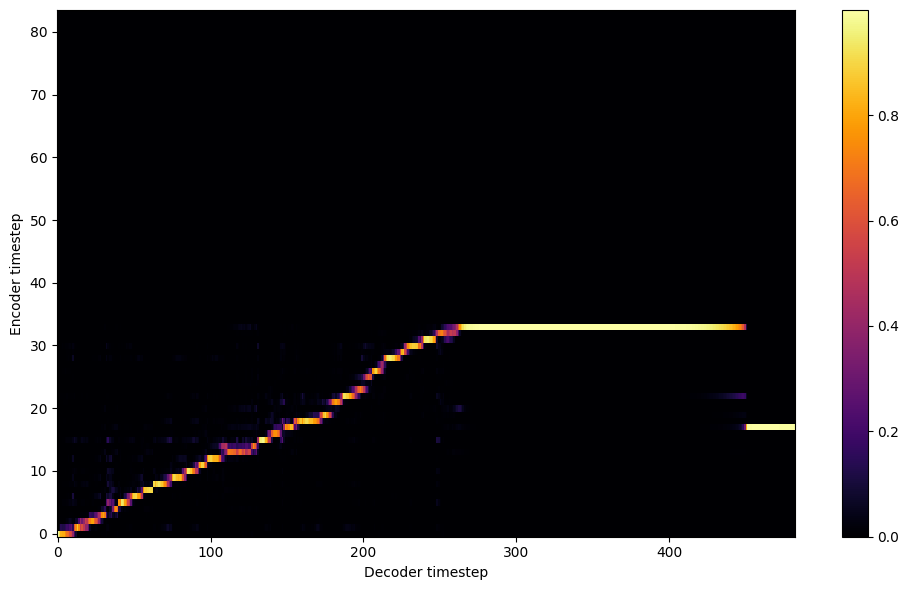


Starting Epoch: 11 Iteration: 166


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 11 Validation loss 181:  0.203535  Time: 0.9m LR: 0.000500


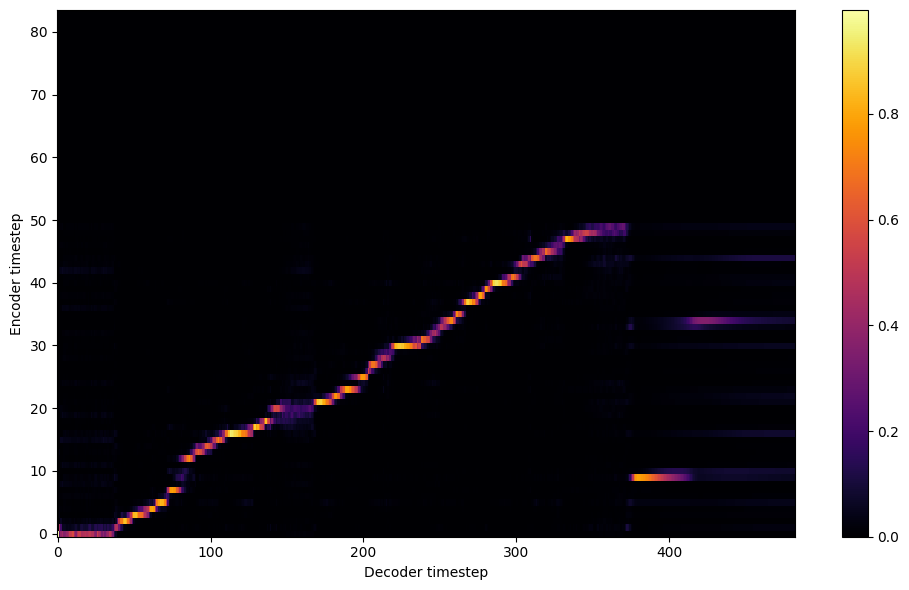


Starting Epoch: 12 Iteration: 181


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 12 Validation loss 196:  0.201114  Time: 0.8m LR: 0.000500


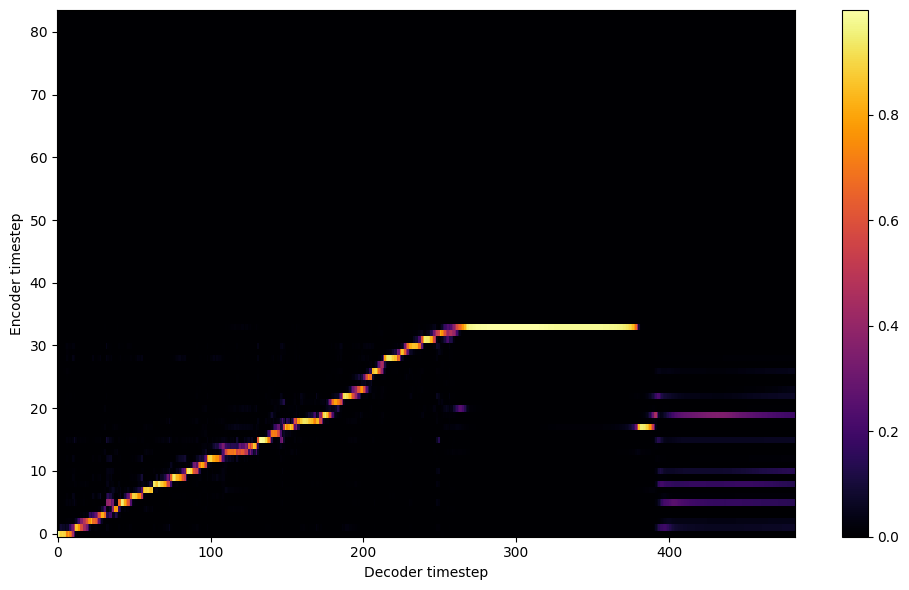


Starting Epoch: 13 Iteration: 196


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 13 Validation loss 211:  0.198549  Time: 0.9m LR: 0.000500


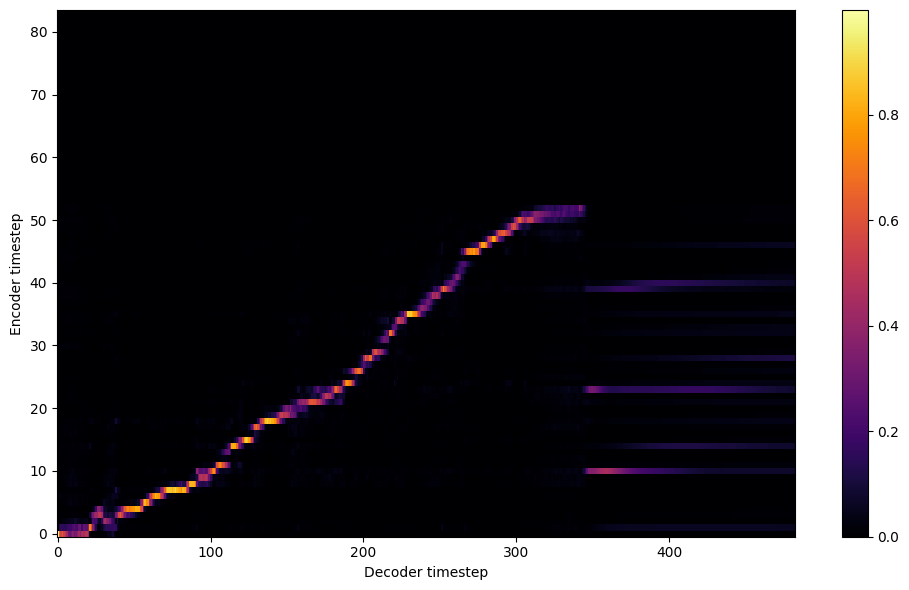


Starting Epoch: 14 Iteration: 211


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 14 Validation loss 226:  0.193022  Time: 0.8m LR: 0.000500


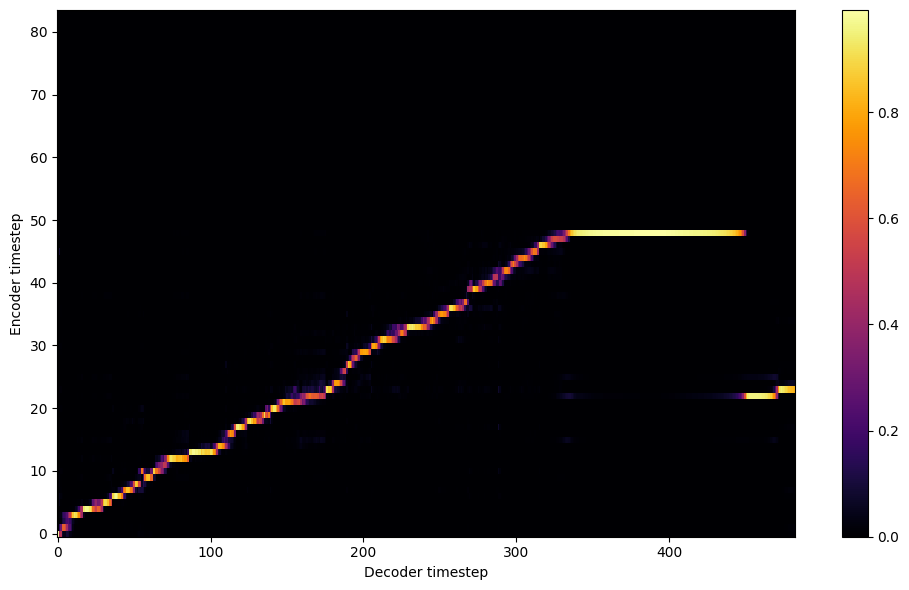


Starting Epoch: 15 Iteration: 226


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 15 Validation loss 241:  0.198114  Time: 0.9m LR: 0.000500


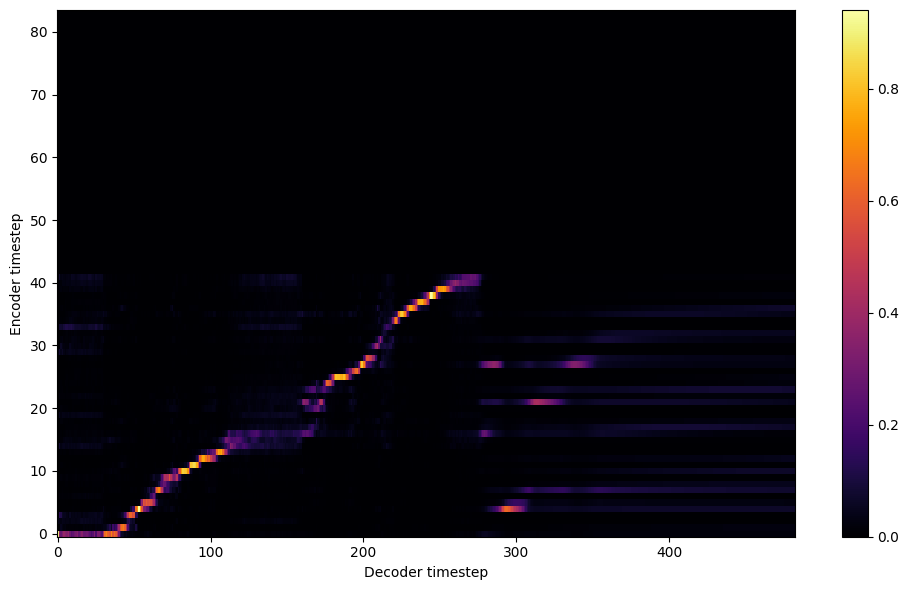


Starting Epoch: 16 Iteration: 241


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 16 Validation loss 256:  0.189824  Time: 0.8m LR: 0.000500


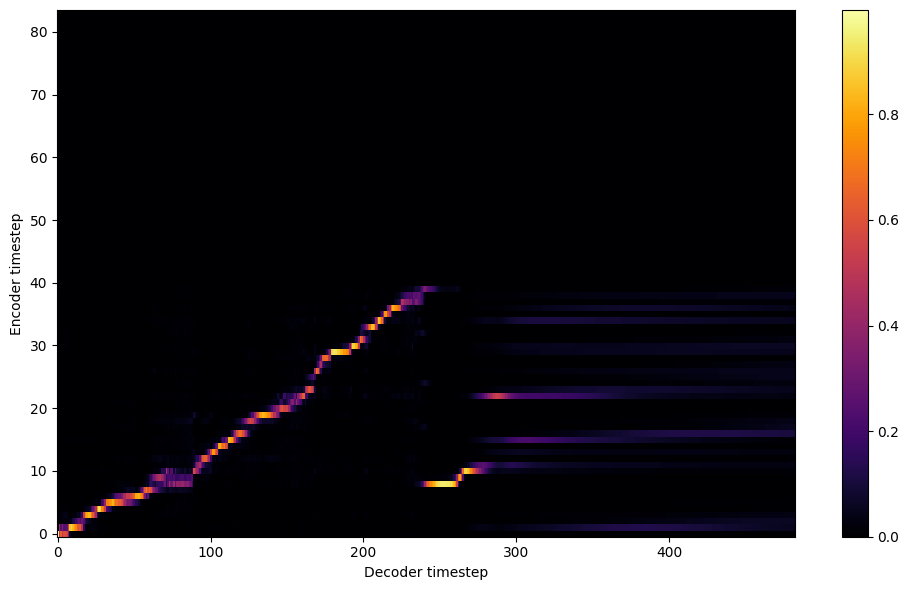


Starting Epoch: 17 Iteration: 256


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 17 Validation loss 271:  0.184871  Time: 0.9m LR: 0.000500


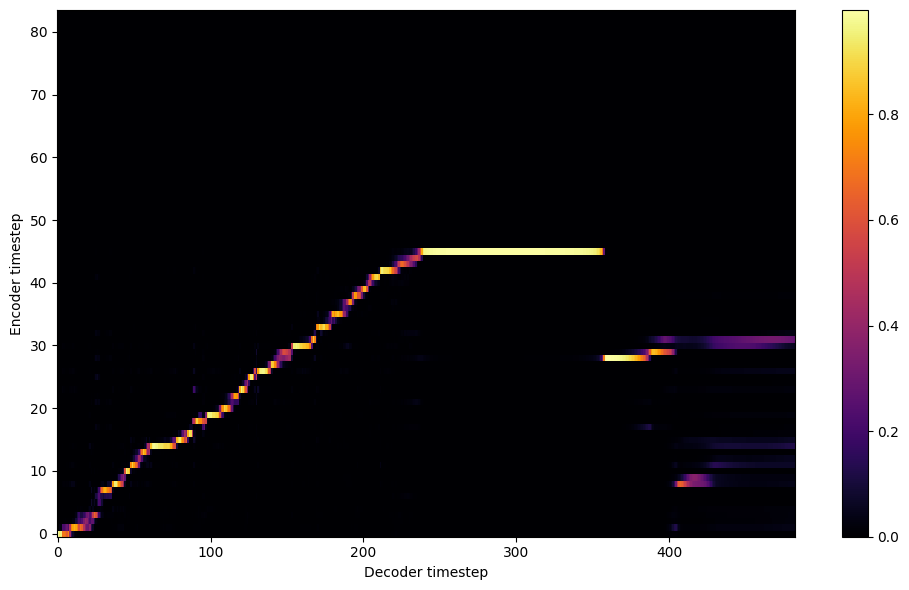


Starting Epoch: 18 Iteration: 271


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 18 Validation loss 286:  0.183548  Time: 0.9m LR: 0.000500


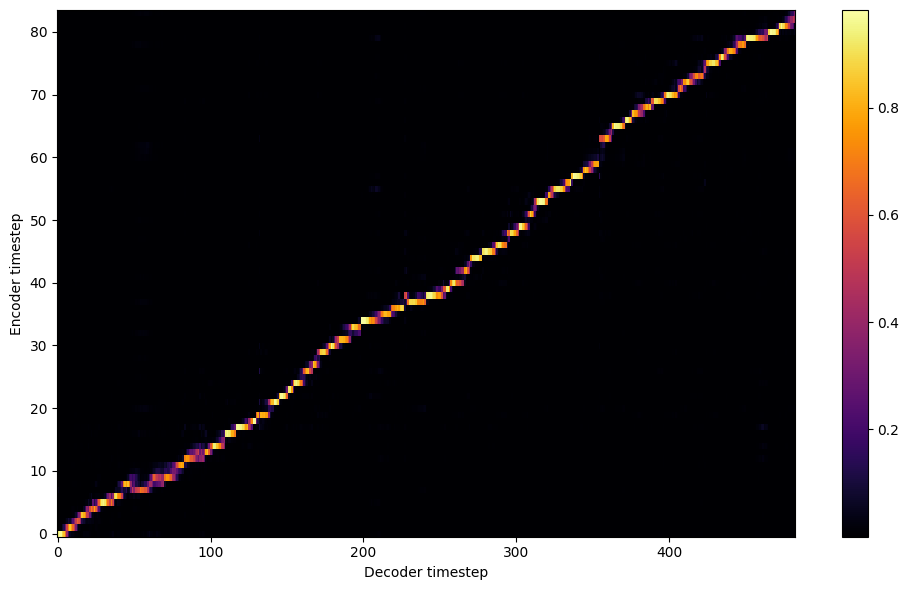


Starting Epoch: 19 Iteration: 286


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 19 Validation loss 301:  0.183817  Time: 0.8m LR: 0.000500


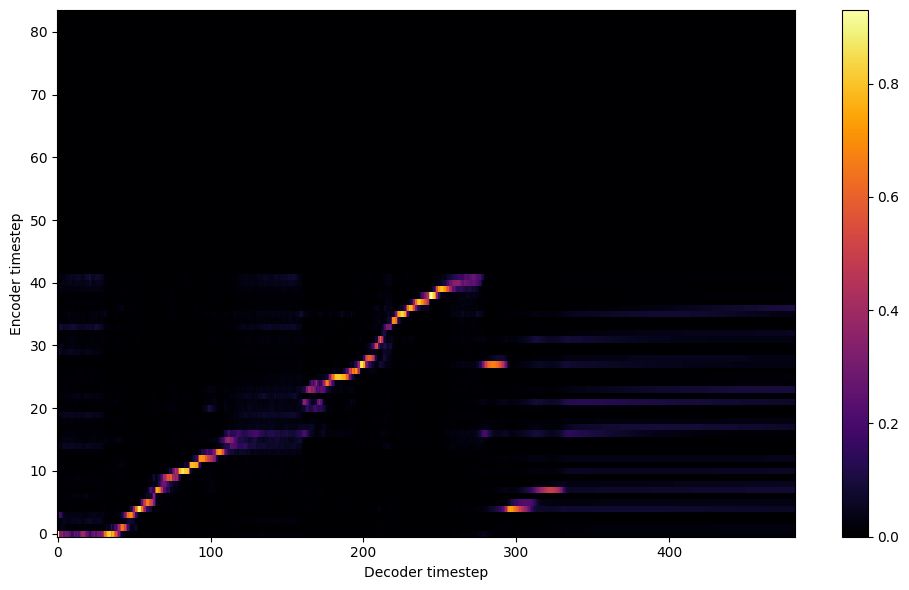

Saving model and optimizer state at iteration 301 to /content/drive/MyDrive/colab/outdir/current_model
Model Saved


In [ ]:
save_interval =  10
backup_interval =  -1

print('FP16 Run:', hparams.fp16_run)
print('Dynamic Loss Scaling:', hparams.dynamic_loss_scaling)
print('Distributed Run:', hparams.distributed_run)
print('cuDNN Enabled:', hparams.cudnn_enabled)
print('cuDNN Benchmark:', hparams.cudnn_benchmark)
train(output_directory, log_directory, checkpoint_path, warm_start, n_gpus, rank, group_name, hparams, log_directory2, save_interval, backup_interval)

<h1> Synthesizing Speech </h1>

In [ ]:
import logging

logging.getLogger('matplotlib').setLevel(logging.WARNING)
logging.getLogger('numba').setLevel(logging.WARNING)
logging.getLogger('librosa').setLevel(logging.WARNING)

hifigan_id = "universal"
HIFIGAN_ID = "universal"

try:
    initialized
except NameError:
    print("Setting up, please wait.\n")
    !pip install tqdm -q
    from tqdm.notebook import tqdm

    with tqdm(total=5, leave=False) as pbar:
        import os
        from os.path import exists, join, basename, splitext
        !pip install resampy
        !pip install git+https://github.com/IAHispano/gdown.git

        git_repo_url = 'https://github.com/justinjohn0306/TTS-TT2.git'
        project_name = splitext(basename(git_repo_url))[0]

        if not exists(project_name):
            !git clone -q --recursive {git_repo_url}
            !git clone -q --recursive https://github.com/justinjohn0306/hifi-gan
            !pip install -q unidecode

        pbar.update(1)

        import sys
        sys.path.append('hifi-gan')
        sys.path.append(project_name)

        import time
        import matplotlib
        import matplotlib.pylab as plt
        import gdown
        d = 'https://drive.google.com/uc?id='

        %matplotlib inline
        import IPython.display as ipd

        import numpy as np

        import torch

        import json

        from hparams import create_hparams

        from model import Tacotron2

        from layers import TacotronSTFT

        from audio_processing import griffin_lim

        from text import text_to_sequence

        from env import AttrDict

        from meldataset import mel_spectrogram, MAX_WAV_VALUE

        from models import Generator

        from denoiser import Denoiser

        import resampy

        import scipy.signal


        pbar.update(1)

        graph_width = 900
        graph_height = 360

        def plot_data(data, figsize=(int(graph_width/100), int(graph_height/100))):

            %matplotlib inline
            fig, axes = plt.subplots(1, len(data), figsize=figsize)

            for i in range(len(data)):

                axes[i].imshow(data[i], aspect='auto', origin='lower',
                            interpolation='none', cmap='inferno')

            fig.canvas.draw()

            plt.show()

        !wget 'https://github.com/sakrin18072/minor-project/releases/download/CMU_dict_mod/merged.dict.txt'
        thisdict = {}
        for line in reversed((open('merged.dict.txt', "r").read()).splitlines()):
            thisdict[(line.split(" ",1))[0]] = (line.split(" ",1))[1].strip()

        pbar.update(1)


        def ARPA(text, punctuation=r"!?,.;", EOS_Token=True):

            out = ''

            for word_ in text.split(" "):

                word = word_; end_chars = ''

                while any(elem in word for elem in punctuation) and len(word) > 1:

                    if word[-1] in punctuation:
                        end_chars = word[-1] + end_chars
                        word = word[:-1]

                    else:
                        break

                try:
                    word_arpa = thisdict[word.upper()]
                    word = "{" + str(word_arpa) + "}"

                except KeyError:
                    pass

                out = (out + " " + word + end_chars).strip()

            if EOS_Token and out[-1] != ";":
                out += ";"

            return out


        def get_hifigan(MODEL_ID, conf_name):

            hifigan_pretrained_model = 'hifimodel_' + conf_name

            if MODEL_ID == 1:
                !wget "https://github.com/justinjohn0306/tacotron2/releases/download/assets/Superres_Twilight_33000" -O $hifigan_pretrained_model

            elif MODEL_ID == "universal":
                !wget "https://github.com/justinjohn0306/tacotron2/releases/download/assets/g_02500000" -O $hifigan_pretrained_model

            else:
                gdown.download(d+MODEL_ID, hifigan_pretrained_model, quiet=False)

            conf = os.path.join("hifi-gan", conf_name + ".json")

            with open(conf) as f:
                json_config = json.loads(f.read())

            h = AttrDict(json_config)

            torch.manual_seed(h.seed)

            hifigan = Generator(h).to(torch.device("cuda"))

            state_dict_g = torch.load(hifigan_pretrained_model, map_location=torch.device("cuda"))

            hifigan.load_state_dict(state_dict_g["generator"])

            hifigan.eval()

            hifigan.remove_weight_norm()

            denoiser = Denoiser(hifigan, mode="normal")

            return hifigan, h, denoiser


        hifigan, h, denoiser = get_hifigan(HIFIGAN_ID, "config_v1")

        hifigan_sr, h2, denoiser_sr = get_hifigan(1, "config_32k")
        pbar.update(1)

        def get_Tactron2():

            tacotron2_pretrained_model = '/content/drive/MyDrive/colab/outdir/current_model'

            if not exists(tacotron2_pretrained_model):
                raise Exception("Tacotron2 model failed to download!")

            hparams = create_hparams()

            hparams.sampling_rate = 22050

            hparams.max_decoder_steps = 3000

            hparams.gate_threshold = 0.25

            model = Tacotron2(hparams)

            state_dict = torch.load(tacotron2_pretrained_model)['state_dict']

            model.load_state_dict(state_dict)

            _ = model.cuda().eval().half()

            return model, hparams

        model, hparams = get_Tactron2()

        pbar.update(1)

        def end_to_end_infer(text, pronounciation_dictionary, show_graphs):

            for i in [x for x in text.split("\n") if len(x)]:

                if not pronounciation_dictionary:
                    if i[-1] != ";": i = i + ";"

                else: i = ARPA(i)

                with torch.no_grad():

                    sequence = np.array(text_to_sequence(i, ['english_cleaners']))[None, :]

                    sequence = torch.autograd.Variable(torch.from_numpy(sequence)).cuda().long()

                    mel_outputs, mel_outputs_postnet, _, alignments = model.inference(sequence)

                    if show_graphs:
                        plot_data((mel_outputs_postnet.float().data.cpu().numpy()[0],
                                alignments.float().data.cpu().numpy()[0].T))

                    y_g_hat = hifigan(mel_outputs_postnet.float())

                    audio = y_g_hat.squeeze()

                    audio = audio * MAX_WAV_VALUE

                    audio_denoised = denoiser(audio.view(1, -1), strength=35)[:, 0]

                    audio_denoised = audio_denoised.cpu().numpy().reshape(-1)

                    normalize = (MAX_WAV_VALUE / np.max(np.abs(audio_denoised))) ** 0.9

                    audio_denoised = audio_denoised * normalize

                    wave = resampy.resample(
                        audio_denoised,
                        h.sampling_rate,
                        h2.sampling_rate,
                        filter="sinc_window",
                        window=scipy.signal.windows.hann,
                        num_zeros=8,
                    )

                    wave_out = wave.astype(np.int16)

                    wave = wave / MAX_WAV_VALUE

                    wave = torch.FloatTensor(wave).to(torch.device("cuda"))

                    new_mel = mel_spectrogram(
                        wave.unsqueeze(0),
                        h2.n_fft,
                        h2.num_mels,
                        h2.sampling_rate,
                        h2.hop_size,
                        h2.win_size,
                        h2.fmin,
                        h2.fmax,
                    )

                    y_g_hat2 = hifigan_sr(new_mel)

                    audio2 = y_g_hat2.squeeze()

                    audio2 = audio2 * MAX_WAV_VALUE
                    audio2_denoised = denoiser(audio2.view(1, -1), strength=35)[:, 0]

                    audio2_denoised = audio2_denoised.cpu().numpy().reshape(-1)

                    b = scipy.signal.firwin(
                        101, cutoff=10500, fs=h2.sampling_rate, pass_zero=False
                    )

                    y = scipy.signal.lfilter(b, [1.0], audio2_denoised)

                    y *= superres_strength

                    y_out = y.astype(np.int16)

                    y_padded = np.zeros(wave_out.shape)

                    y_padded[: y_out.shape[0]] = y_out

                    sr_mix = wave_out + y_padded

                    sr_mix = sr_mix / normalize

                    print("")

                    ipd.display(ipd.Audio(sr_mix.astype(np.int16), rate=h2.sampling_rate))

    from IPython.display import clear_output
    clear_output()

    initialized = "Ready"

Current Config:
pronounciation_dictionary: False
show_graphs: True
max_duration (in seconds): 20
stop_threshold: 0.5
superres_strength: 10


Enter/Paste your text.
--------------------------------------------------
Wealth is important.


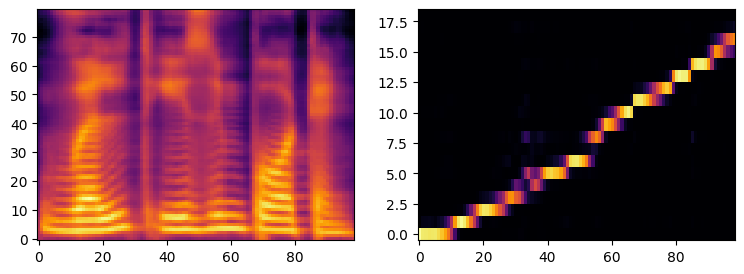

--------------------------------------------------
The less you want something, the less you are thinking about it, the less you are obsessing over it, the more you are going to do it in a natural way.


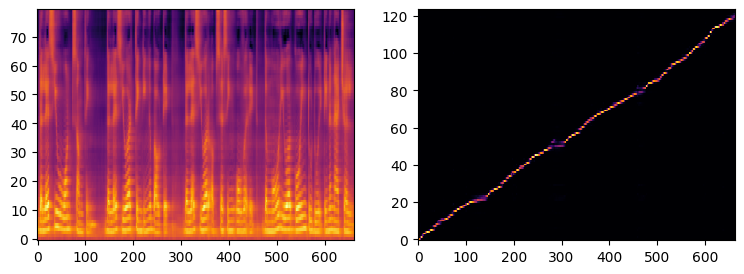

--------------------------------------------------
Please pass the salt and pepper.


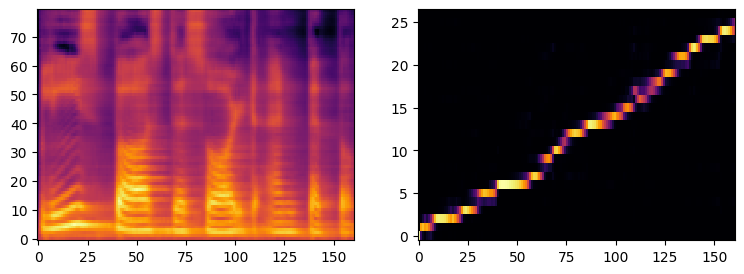

--------------------------------------------------
Money is how we transfer wealth.


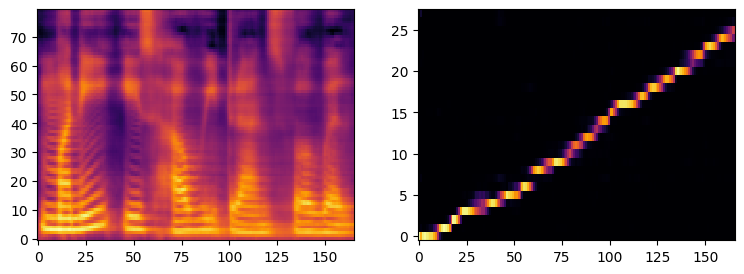

max value is  tensor(1.0007, device='cuda:0')



--------------------------------------------------
Stopping...


In [ ]:
pronounciation_dictionary = False
show_graphs = True
max_duration = 20
model.decoder.max_decoder_steps = max_duration * 80
stop_threshold = 0.5
model.decoder.gate_threshold = stop_threshold
superres_strength = 10

print(f"Current Config:\npronounciation_dictionary: {pronounciation_dictionary}\nshow_graphs: {show_graphs}\nmax_duration (in seconds): {max_duration}\nstop_threshold: {stop_threshold}\nsuperres_strength: {superres_strength}\n\n")

time.sleep(1)
print("Enter/Paste your text.")
contents = []
while True:
    try:
        print("-"*50)
        line = input()
        if line == "":
            continue
        end_to_end_infer(line, not pronounciation_dictionary, show_graphs)
    except EOFError:
        break
    except KeyboardInterrupt:
        print("Stopping...")
        break